<h1 align="center"> TEL341 Simulación de Redes  </h1>
<h2 align="center"> Ayudantía 2 - Generación de variable aleatoria <h2>
<h2 align="center"> <img src="https://jupyter.org/assets/homepage/main-logo.svg" width="150"> </h2>

## Trabajando con Variables Aleatorias

En el curso se usará la variable aleatoria exponencial X ~ Exp($\lambda$), a continuación se explicará como poder obtener muestras de la variable aleatoria exponencial.

Una posible método que es sencillo de utilizar corresponde al método de la transformada inversa ya que es sencilla de trabajar

### Método de la transformada inversa 
Sea X una variable aleatoria con función de distribución de probabilidad acumulada $F$, continua e invertible, y sea $F^{-1}$ su función inversa. Entonces, la variable aleatoria U=F(X) tiene distribución uniforme en [0,1]. Como consecuencia, si U es una variable aleatoria uniforme en [0,1] entonces la variable aleatoria $F^{-1}(U)=X$ satisface la distribución F

Dada la función de densidad de probabilidad (PDF), se elabora la CDF como: <br><br>

<center> $F(x) = \int\limits_{-\infty}^x f(x) dx$ <center>

Ahora si consideramos $ f(x) = \lambda e^{-\lambda x}$ una función de distribución exponencial podemos elaborar su CDF y elaborar para obtener una expresión que nos permita generar tiempos aleatorios. <br><br>

<center> $F(x) = \int\limits_{-\infty}^x \lambda e^{-\lambda x} dx$ <center>
<center> $F(x) =  1 - e^{-\lambda x} ; \forall x \geq 0$   <center> <br>
    
 Por ende, una muestra **x** de tiempo de la distribución $Exp(\lambda)$ quedaría dada por: <br><br>
    
<center> $x = F^{-1}(x) =  - \frac{1}{\lambda} ln(1 - u)$ <center> <br>    
<center> $x = - \frac{1}{\lambda} ln(1 - u)$ <center> <br>   

Así como la variable aleatoria (1 - u) también se encuentra distribuida por una variable uniforme en [0,1] podemos obtener x como un tiempo aleatorio. 
    
¿Por qué distribución exponencial? Se utiliza para modelar tiempos de espera para la ocurrencia de un cierto evento 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Generación de tiempos aleatorios Exp(lambda)
def randExp(lamb,size=1):    
    pt = np.random.rand(size)
    return (-1/lamb)*np.log(pt)

# Distribución exponencial Exp(lambda)
def expDist(lamb,x):
    return lamb*np.exp(-lamb*x)

In [4]:
exp = randExp(3)
exp

array([0.34079701])

In [5]:
exp = randExp(3,size=10)
exp

array([0.08807153, 0.24953051, 0.24750145, 0.23462777, 0.06008804,
       0.14567866, 0.39954144, 0.22038415, 0.22715214, 0.49597091])

### Procedimiento de la demostración

1. Se generaron 1000 muestras de Exp($\lambda$=3)
2. Se calcula el estimador $\overline{\lambda} = \frac{1}{\overline{x}}$ donde $\overline{x}=$ media de muestra generada
3. Se calcula el valor *k* aplicando la fórmula de Sturges (Indica el número de clases necesarias para elaborar un histograma)
4. Se crea una figura para graficar los valores
5. Se crea un histograma con los datos
6. Se plotea la función teorica para la distribución exponencial 
7. Se plotea la función generada para la distribución exponencial
8. Se agrega la leyenda y titulo al gráfico
9. Se muestra la figura resultante con los datos graficados
10. Se muestra el resultado del estimador. 

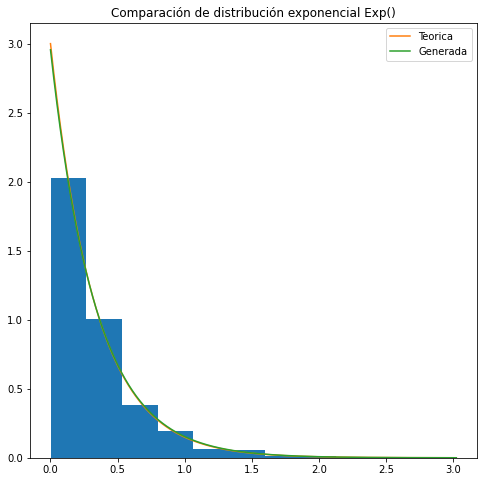

Valor del estimador: 2.9553217900738207


In [29]:
### Comparación entre valores teóricos y generados
exp = randExp(3,size=1000)
lambda_mean = 1/exp.mean()

k = (int)(np.ceil(np.log2(exp.size)+1))    ### 1 + log2(M) donde M es la muestra de los datos

plt.figure(figsize=(8, 8))
x = np.linspace(0,exp.max()+0.1,1000)
plt.hist(exp,bins=k,density=True)
plt.plot(x,expDist(3,x),label="Teorica")
plt.plot(x,expDist(lambda_mean,x),label="Generada")
plt.legend(loc="best")
plt.title("Comparación de distribución exponencial Exp()")
plt.show()
print("Valor del estimador:",lambda_mean)

¿Qupe ocurre cuando la CDF no es trivial por lo que no puede despejarse facilmente? Por ejemplo el caso de la distribución normal.

### Método de Box-Muller

1. Se generan dos muestras $U_{1}$ y $U_{2}$ ambas distribuidas uniformemente en el intervalo [0,1]. Osea $U_{1}$ ~ Uniform(0,1) y $U_{2}$ ~ Uniform(0,1)
2. Se calcula $R = \sqrt{-2\ln(U_{1})}\cos(2\pi U_{2})$ 
3. Se calcula $x = \sigma R + \mu$

Donde R está distribuido por R ~ $N(0,1)$ mientras que X esta distribuido por X ~ $N(\mu,\sigma^{2})$

### Ejercicio

Genere $10^{6}$ muestras para una distribución N(5,1) y generar un gráfico similar al anterior con el histograma de los datos, la gráfica de la distribución teórica y generada. El gráfico generado tiene que tener título, nombre de los ejes y leyenda descriptiva, además se debe incluir el valor de los estimadores calculados.

Correo: juan.sanchezp@sansano.usm.cl.
Asunto: [TEL341] Ejercicio Estimadores - Nombre.Apellido

Entregue el *código ipynb* realizado hasta el miércoles 06 a las 2 3.59.59 por correo. La 1ra persona en entregar el problema resuelto recibe 10pts, la 2da y 3ra persona reciben 5pts para la primera tarea. 

<figure>
  <br><img title="Distribución Normal" alt=Norm" src="normal.png" width="500" height="600"><br>
  <center><figcaption>Gráfico para distribución normal N(0,1) Teórica vs Empirica </figcaption></center>
</figure>